In [1]:
# Import statements
from full_spectrum_plot import plot_spectrum
from astropy.stats import mad_std
from astropy.io import fits
from spectral_cube import OneDSpectrum
from astropy import units as u
import pyspeckit
import numpy as np
import matplotlib.pyplot as plt

# Define directory we're working with
results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/spectra/'

In [2]:
# Get names of spectral windows
# I think these are in vaguely the right order?
freq_spws = [
'87_spw25',
# '87_spw102', # duplicate of above
'89_spw27',
# '89_spw104', # duplicate of above

'91_spw25', 
# '91_spw102', # duplicate of above
'93_spw27',
# '93_spw104', # duplicate of above
'95_spw25', 
'97_spw27', 
'98_spw29',
# '98_spw106', # duplicate of above
# '99_spw25', # duplicate of above
'99_spw31',  
# '99_spw108', # duplicate of above

# '101_spw27', # duplicate of above
'102_spw23',
'102_spw29', 
# '102_spw106', # duplicate of above
'104_spw25',
'103_spw31', 
# '103_spw108', # duplicate of above
'106_spw29',
'107_spw31',

'110_spw29',
'111_spw31',
'112_spw27',
'114_spw29',

'127_spw65', 
'129_spw67',

'130_spw105',
'132_spw107',
'134_spw45', 
'135_spw47',
'137_spw85',
'137_spw69',
# '139_spw87', # duplicate of above
'139_spw71',
# '141_spw25', # duplicate of above

'140_spw109',
'142_spw111',
'144_spw49',
'146_spw51',
'147_spw89',
'149_spw91',

'142_spw27', # mislabeled
# '151_spw29', # duplicate of above
'152_spw31',

'244_spw65',
'245_spw67',
'247_spw105',
'249_spw107',

'250_spw25',
'252_spw27',
'254_spw85',
'255_spw87',
'257_spw45',
'259_spw47',
# '258_spw69', # significant overlap with above?
'259_spw71',

'261_spw109',
'263_spw111',
'264_spw29',
'266_spw31',
'268_spw89',

'270_spw91',
'271_spw49',
'273_spw51'
]

In [4]:
# Create list of filenames and plot spectral coverage of our spectral windows
max_fns = []
spectra = []
for i in range(len(freq_spws)):
    max_fn = results+'source_ab_'+freq_spws[i]+'_clean_2sigma_n50000_masked_3sigma_pbmask0p18.max.fits'
    max_fns.append(max_fn)
    sp = OneDSpectrum.from_hdu(fits.open(max_fns[i])).to(u.K)
    sp = pyspeckit.Spectrum.from_hdu(sp.hdu)
    spectra.append(sp)
#     print(i,': ',freq_spws[i])
#     plot_spectrum(max_fn)

There are multiple beams for this spectrum that are being ignored when creating the HDU.
There are multiple beams for this spectrum that are being ignored when creating the HDU.
There are multiple beams for this spectrum that are being ignored when creating the HDU.
There are multiple beams for this spectrum that are being ignored when creating the HDU.
There are multiple beams for this spectrum that are being ignored when creating the HDU.
There are multiple beams for this spectrum that are being ignored when creating the HDU.
There are multiple beams for this spectrum that are being ignored when creating the HDU.
There are multiple beams for this spectrum that are being ignored when creating the HDU.
There are multiple beams for this spectrum that are being ignored when creating the HDU.
There are multiple beams for this spectrum that are being ignored when creating the HDU.
There are multiple beams for this spectrum that are being ignored when creating the HDU.
There are multiple be

In [5]:
'''This is used for the next cell, which is the method I have abandoned.'''
# # Loop through every spectral window and estimate the the RMS with MAD (spws are noise-dominated)
# # Plot RMS estimate (MAD) in each spectral window
# center_freqs = []
# mad_stds = []
# for i in range(len(freq_spws)):
#     center_freq = np.mean(spectra[i].xarr)
#     sigma = mad_std(spectra[i].data, ignore_nan=True) # in K?
#     center_freqs.append(center_freq.value)
#     mad_stds.append(sigma)
# center_freqs = np.array(center_freqs)
    
# plt.figure(figsize=(9, 5))
# plt.scatter(center_freqs*(1/(10.**9)), mad_stds)
# plt.xlabel('Center frequency (GHz)')
# plt.ylabel('MAD-estimated standard deviation (K)')
# plt.title('Standard deviation per spectral window')
# plt.savefig('rms_per_spw.png', dpi = 200)
# plt.show()

'This is used for the next cell, which is the method I have abandoned.'

In [6]:
'''This is the "cases" way of doing this, which I am giving up on for now (4/20).
Uncomment all lines to be able to use.'''
# # Divide total spectral space into 1 GHz bins
# bin_size = 1.0e9
# freq_bin_edges = np.arange(spectra[0].xarr[0].value, spectra[-1].xarr[-1].value, bin_size)
# freq_bin_centers = np.arange(spectra[0].xarr[0].value + 0.5*bin_size, 
#                              spectra[-1].xarr[-1].value - 0.5*bin_size, bin_size)

# fractions = [] # initialize array of fractional bandwidths above 7 sigma
# found_a_case = 0 # initialize count of found cases

# for edge_i in range(len(freq_bin_centers)):
#     found = False # we have not found a spw case yet
#     ll, ul = freq_bin_edges[edge_i]*u.Hz, freq_bin_edges[edge_i+1]*u.Hz # I had this as GHz oops
# #     print("Edge",edge_i)
    
#     for spectrum_i in range(len(spectra)):
# #         print("Spectrum",spectrum_i)
        
#         ll_in_spw = spectra[spectrum_i].xarr.in_range(ll)
#         ul_in_spw = spectra[spectrum_i].xarr.in_range(ul)
#         ll_in_last_spw = False
#         if spectrum_i != 0:
#             ll_in_last_spw = spectra[spectrum_i-1].xarr.in_range(ll)
#             ul_in_last_spw = spectra[spectrum_i-1].xarr.in_range(ul)
#         ul_in_next_spw = False
#         if spectrum_i != len(spectra)-1:
#             ul_in_next_spw = spectra[spectrum_i+1].xarr.in_range(ul)
#             ll_in_next_spw = spectra[spectrum_i+1].xarr.in_range(ll)
            
#         # Special cases: first and last bins, assume we're in case 1
#         # I'M NOT SUPER HAPPY WITH THIS...
#         if edge_i == 0:
#             print("Case 0")
#             found_a_case += 1
#             found = True
#             break
#         if edge_i == len(spectra)-1:
#             print("Case 0")
#             found_a_case += 1
#             found = True
#             break
        
#         # Case 1: bin is entirely in this spw, and not neighboring ones
#         if ll_in_spw and ul_in_spw and not ll_in_last_spw and not ul_in_next_spw:
#             print("Case 1")
#             found_a_case += 1
#             found = True
# #             # If both edges of bin are within one spw, calculate fraction above 7 sigma in that spw
# #             spectrum_in_bin = spectra[spectrum_i].slice(ll, ul, unit=u.Hz) # access spec in bin
# #             above_7_sigma_mask = spectrum_in_bin.data > 7.0*mad_stds[spectrum_i]
# #             frac = np.count_nonzero(above_7_sigma_mask)/len(above_7_sigma_mask) # frac in mask
# #             fractions.append(frac)

#         # Case 2: bin overlaps with next spw, but still fully within this spw
#         if ll_in_spw and ul_in_spw and not ll_in_next_spw and ul_in_next_spw:
#             print("Case 2")
#             if found == True:
#                 raise ValueError
#             found_a_case += 1
#             found = True
    
#         # Case 2.5: mirror image of last case
#         if ll_in_spw and ul_in_spw and not ul_in_last_spw and ll_in_last_spw:
#             print("Case 2.5")
#             if found == True:
#                 raise ValueError
#             found_a_case += 1
#             found = True
        
#         # Case 3: significant overlap
#         if ll_in_spw and ul_in_spw and ul_in_next_spw and ll_in_next_spw:
#             print("Case 3")
#             if found == True:
#                 raise ValueError
#             found_a_case += 1
#             found = True
            
#         # Case 3.5: significant overlap mirrored
#         if ll_in_spw and ul_in_spw and ul_in_last_spw and ll_in_last_spw:
#             print("Case 3.5")
#             if found == True:
#                 raise ValueError
#             found_a_case += 1
#             found = True
        
#         # Case 4: bin is partially in this spw and next spw
        
#         # Case 4.5: mirror image of last case
        
        
#         # more cases??? jesus.
        
#         # Case 5: bin runs over edge of this spw, and there is no neighboring spw
#         if ll_in_spw and not ul_in_spw and not ul_in_next_spw:
#             print("Case 5")
#             if found == True:
#                 raise ValueError
#             found_a_case += 1
#             found = True
            
#         # Case 5.5: mirror image of last case
#         if ul_in_spw and not ll_in_spw and not ll_in_last_spw:
#             print("Case 5.5")
#             if found == True:
#                 raise ValueError
#             found_a_case += 1
#             found = True 
#             # may need to add a continue, but shouldn't need to?
            
#         # Case 6: bin not in this spectral window
#         if not ll_in_spw and not ul_in_spw:
#             if found == True:
#                 raise ValueError
#             continue # skip to next spw
        
#         if found == True:
#             break # if we found something, stop looking through spectral windows
            
#         else:
#             print("no case found")
    
#     # Case 6: if we've gone through all spws and found = False, fraction is zero for this bin
#     if found == False:
#         print("Case 6")
#         found_a_case += 1
#         frac = 0.0

# #         elif spectra[spectrum_i].xarr.in_range(ll) and not spectra[spectrum_i].xarr.in_range(ul): 
# #             # If only first edge is in spw, use this spw and the next spw to calc frac > 7 sigma
# #             sf_1 = ((spectra[spectrum_i].xarr[-1] - ll)/bin_size).value # frac of bin in 1st spw
# #             ml = spectra[spectrum_i+1].xarr[-1].value # where first part of bin ends
# #             spectrum_in_bin_1 = spectra[spectrum_i].slice(ll, ml, unit=u.Hz)
# #             above_7_sigma_mask_1 = spectrum_in_bin_1.data > 7.0*mad_stds[spectrum_i]
# #             frac_1 = np.count_nonzero(above_7_sigma_mask_1)/len(above_7_sigma_mask_1)
            
# #             if spectra[spectrum_i+1].xarr.in_range(ul): # if bin upper limit in next spw
# #                 sf_2 = 1.0 - sf_1 # fraction of bin in 2nd spw
# #                 spectrum_in_bin_2 = spectra[spectrum_i+1].slice(ml, ul, unit=u.Hz)
# #                 above_7_sigma_mask_2 = spectrum_in_bin_2.data > 7.0*mad_stds[spectrum_i+1]
# #                 frac_2 = np.count_nonzero(above_7_sigma_mask_2)/len(above_7_sigma_mask_2)
# #             else:
# #                 frac_2 = 0.0
        
# #             frac_weighted_av = frac_1*sf_1 + frac_2*sf_2 # weighted average of fractions > 7sigma
# #             fractions.append(frac_weighted_av)
            
# #         else:
# #             flag = True # raise flag because bin is not in a spectrum
# #             break
        
# #     if flag == True:
# #         fractions.append(0.0) # bin is empty
# #         flag = False   

'This is the "cases" way of doing this, which I am giving up on for now (4/20).\nUncomment all lines to be able to use.'

In [8]:
'''Spectrum interpolation method (maybe easier to conceptualize?)'''
# Divide total spectral space into 1 GHz bins
bin_size = 1.0e9
freq_bin_edges = np.arange(spectra[0].xarr[0].value, spectra[-1].xarr[-1].value, bin_size)
freq_bin_centers = np.arange(spectra[0].xarr[0].value + 0.5*bin_size, 
                             spectra[-1].xarr[-1].value - 0.5*bin_size, bin_size)

step_size = spectra[0].xarr[1] - spectra[0].xarr[0] # get step size from spectrum

fractions = []
for edge_i in range(len(freq_bin_centers)): # Loop over each bin
    ll, ul = freq_bin_edges[edge_i]*u.Hz, freq_bin_edges[edge_i+1]*u.Hz # I had this as GHz oops
    
    overlapping_spws = []
    # Loop over each spectral window
    for spectrum_i in range(len(spectra)):
        # Check for overlap between the bin and the spectral window
        ll_in_spw = spectra[spectrum_i].xarr.in_range(ll)
        ul_in_spw = spectra[spectrum_i].xarr.in_range(ul)
        if ll_in_spw or ul_in_spw:
            overlapping_spws.append(spectrum_i)
            
    # If there are no spws that overlap with bin, set fraction to 0
    if len(overlapping_spws) == 0:
        frac = np.nan
        fractions.append(frac)
    
    else:
        # Create x-axis from bin and interpolate all spectra onto that x-axis
        xarr = pyspeckit.units.SpectroscopicAxis(np.arange(ll.value, ul.value, step_size.value)*u.Hz)
        interp_spectra = []
        for spw in overlapping_spws:
            interp_spectrum = pyspeckit.spectrum.interpolation.interp_on_axes(spectra[spw], xarr)
            interp_spectra.append(interp_spectrum)

        # Average all spectra together
        if len(interp_spectra) == 1:
            spec_average = interp_spectra[0]
        if len(interp_spectra) > 1:
            spec_all = pyspeckit.spectrum.classes.ObsBlock(interp_spectra)
            spec_average = spec_all.average()

        # Calculate MAD-estimated RMS of averaged spectrum
        sigma = mad_std(spec_average.data, ignore_nan=True) # in K?
        above_7_sigma_mask = spec_average.data > 7.0*sigma

        # Calculate fraction of averaged spectrum above 7*sigma
        frac = np.count_nonzero(above_7_sigma_mask)/len(above_7_sigma_mask) # frac in mask
        fractions.append(frac)

976431.0133361816 Hz


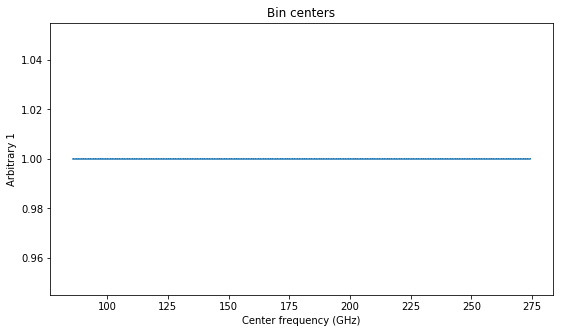

In [13]:
plt.figure(figsize=(9, 5))
plt.plot(freq_bin_centers*(1/(10.**9)), freq_bin_centers/freq_bin_centers, marker=',')
plt.xlabel('Center frequency (GHz)')
plt.ylabel('Arbitrary 1')
plt.title('Bin centers')
plt.show()

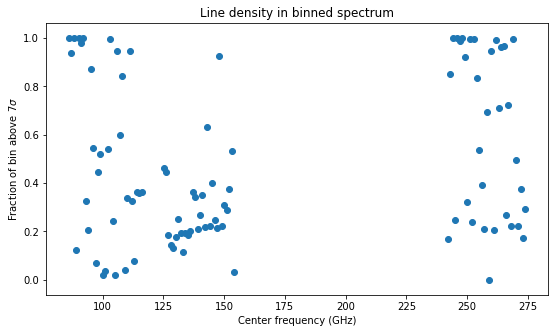

In [140]:
plt.figure(figsize=(9, 5))
plt.scatter(freq_bin_centers*(1/(10.**9)), fractions)
plt.xlabel('Center frequency (GHz)')
plt.ylabel('Fraction of bin above $7\sigma$')
plt.title('Line density in binned spectrum')
plt.savefig('frac_above_7sigma.png', dpi = 200)
plt.show()